In [4]:
pd.__version__

'2.3.1'

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

# Q2 How many records in the dataset?

In [6]:
# how many records in the dataset
len(df)

2160

In [7]:
# how many rows & how many columns
df.shape

(2160, 12)

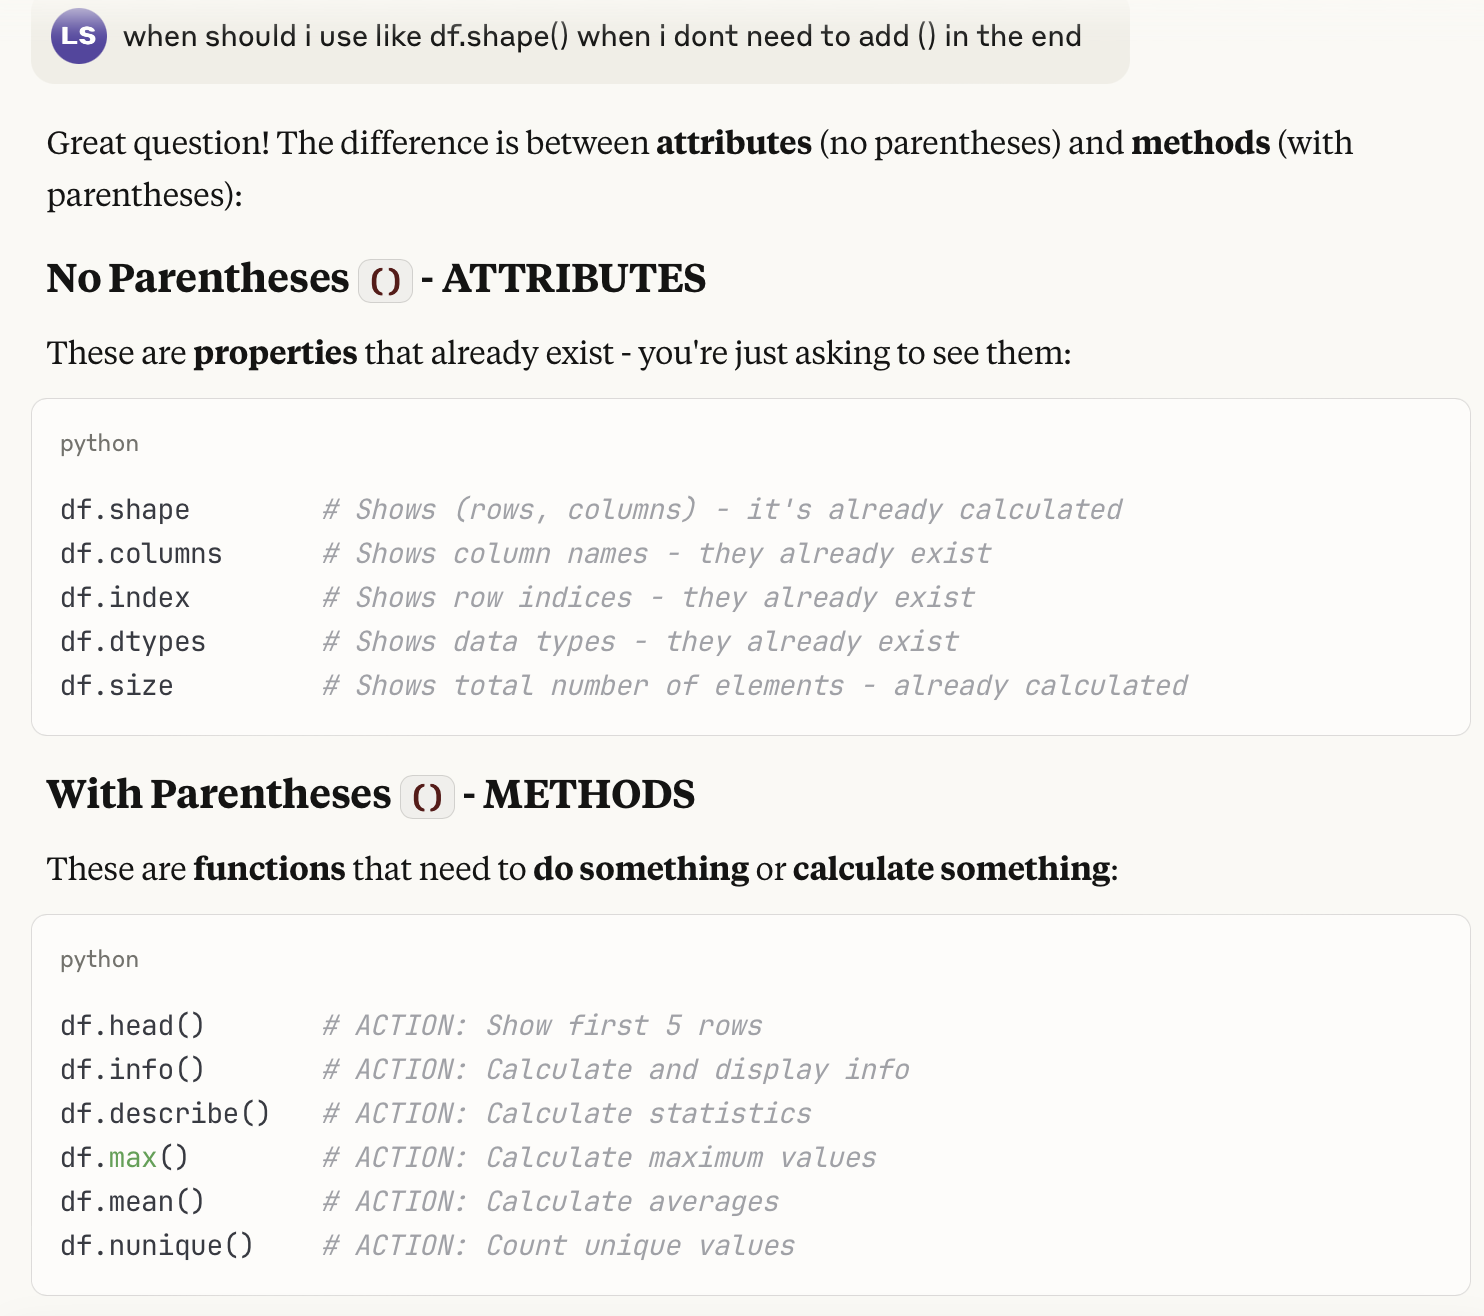

In [90]:
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


# Q3 How many unique values in one column?

In [9]:
# how many laptop brands are in the dataset
len(df.Brand.unique())

27

In [10]:
# brackets for columns - suitable for all kinds of column names
df['Brand'].nunique()

27

In [11]:
df.nunique()

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               44
Screen            29
Touch              2
Final Price     1440
dtype: int64

# Q4 How many null values in each column? & how many columns containing null values?

In [12]:
# how many null values in each column
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [13]:
# how many columns containing null values
df.isnull().any().sum()

np.int64(3)

In [14]:
df.isnull().any().sum().tolist()

3

## Null/Zero/NaN percentage

In [15]:
# calculating null percentage in each column
df.isnull().sum()/len(df)*100

Laptop           0.000000
Status           0.000000
Brand            0.000000
Model            0.000000
CPU              0.000000
RAM              0.000000
Storage          0.000000
Storage type     1.944444
GPU             63.472222
Screen           0.185185
Touch            0.000000
Final Price      0.000000
dtype: float64

In [16]:
# the column list of high null columns
# df.columns[condition] returns a pandas Index object
# .tolist() converts it to a regular Python list
columns_high_null = df.columns[round(df.isnull().sum()/len(df) * 100, 0) >50].tolist()
columns_high_null

['GPU']

In [17]:
high_zero_percent = df.columns[(df==8).sum()/len(df)*100 > 20].tolist()
high_zero_percent

['RAM']

In [18]:
high_nan = df.columns[df.isna().sum()/len(df)*100 > 50].tolist()
high_nan

['GPU']

notes:
1. use df.columns[condition] for filtering on some conditions!!
2. use .tolist() to convert to a list, so you don't get unnecessary propertys for the columns
3.  df.isnull().sum() v.s (df==0).sum() --------- why df.isnull but not df.(df==0) ??? ----- 因为isnull是一个method， 作用在df上， 但是df==0是一个运算，df==0的结果就是另一个dataframe

# Q5 what's the max value of 'price' column for one specific brand in 'brand' column?

Notes:

1. df[condition] = "Give me rows that match"

2. df.columns[condition] = "Give me column names that match"

3. You can't use .[...] syntax - it should be [...]

4. Remember the pattern: Filter rows → Select column → Apply method!


In [23]:
# What's the maximum final price of Dell notebooks in the dataset?
df[df['Brand']== 'Dell']['Final Price'].max().tolist()

3936.0

# Q6 Median/Mode value of Screen

In [55]:
# Find the median value of Screen column in the dataset.

df['Screen'].median().tolist()

15.6

出现最频繁的数值叫做mode --- .mode() return的结果是一个series，因为有可能会出现平手，多个数值出现同样多次，所以我们需要加一个index去指明要哪个数值，所以如果只有一个mode，那么就是mode()[0]

In [54]:
# Next, calculate the most frequent value of the same Screen column.
df['Screen'].mode()[0].tolist()

15.6

value_counts() ---- 每一个数值出现了多少次

区别于.mode() returns value, .value_counts() returns a Series with index=values, data=counts

In [73]:
df['Screen'].value_counts()

Screen
15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.40      19
13.50      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
12.40       6
14.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.95       1
10.10       1
Name: count, dtype: int64

In [83]:
# [] 里的index在这个例子中并不是它的排位，因为这里的index实际上是screen的尺寸，series中的第一列
df['Screen'].value_counts()[16.20].tolist() 

10

In [82]:
#.index[] accesses the labels/names of the rows or columns in a pandas object, not the actual data values.
df['Screen'].value_counts().index[0].tolist() 

15.6

In [86]:
# .iloc[] is position-based indexing 
# it accesses data by its numerical position (like counting 0, 1, 2, 3...), regardless of what the actual index labels are.
# 给的value不是index那列的 给的是实际对应的数值
df['Screen'].value_counts().iloc[0].tolist()

1009

In [87]:
df['Screen'].fillna(15.60)

0       15.6
1       15.6
2       15.6
3       15.6
4       15.6
        ... 
2155    17.3
2156    17.3
2157    17.3
2158    13.4
2159    13.4
Name: Screen, Length: 2160, dtype: float64

In [88]:
df['Screen'].median().tolist()

15.6

# Q7 Sum of weights

In [121]:
# Select all the "Innjoo" laptops from the dataset. Select only columns RAM, Storage, Screen
# Remember: Multiple columns = double brackets [['col1', 'col2', 'col3']]
innjoo_laptop = df[df['Brand'] == 'Innjoo'][['RAM', 'Storage', 'Screen']]
innjoo_laptop

,RAM,Storage,Screen
1478,8,256,15.6
1479,8,512,15.6
1480,4,64,14.1
1481,6,64,14.1
1482,6,128,14.1
1483,6,128,14.1


In [128]:
# Getting the underlying numpy array
X = innjoo_laptop.values
X

array([[  8. , 256. ,  15.6],
       [  8. , 512. ,  15.6],
       [  4. ,  64. ,  14.1],
       [  6. ,  64. ,  14.1],
       [  6. , 128. ,  14.1],
       [  6. , 128. ,  14.1]])

In [129]:
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T
# .dot 来做矩阵乘法！！
XTX = X.T.dot(X)
XTX

array([[2.52000e+02, 8.32000e+03, 5.59800e+02],
       [8.32000e+03, 3.68640e+05, 1.73952e+04],
       [5.59800e+02, 1.73952e+04, 1.28196e+03]])

In [130]:
# np.linalg.inv() 逆矩阵
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.78025381e-01, -1.51791334e-03, -1.00809855e-01],
       [-1.51791334e-03,  1.58286725e-05,  4.48052175e-04],
       [-1.00809855e-01,  4.48052175e-04,  3.87214888e-02]])

In [132]:
y = np.array([1100, 1300, 800, 900, 1000, 1100])
y

array([1100, 1300,  800,  900, 1000, 1100])

**y = np.array([1100, 1300, 800, 900, 1000, 1100]) VS. y = [1100, 1300, 800, 900, 1000, 1100]**
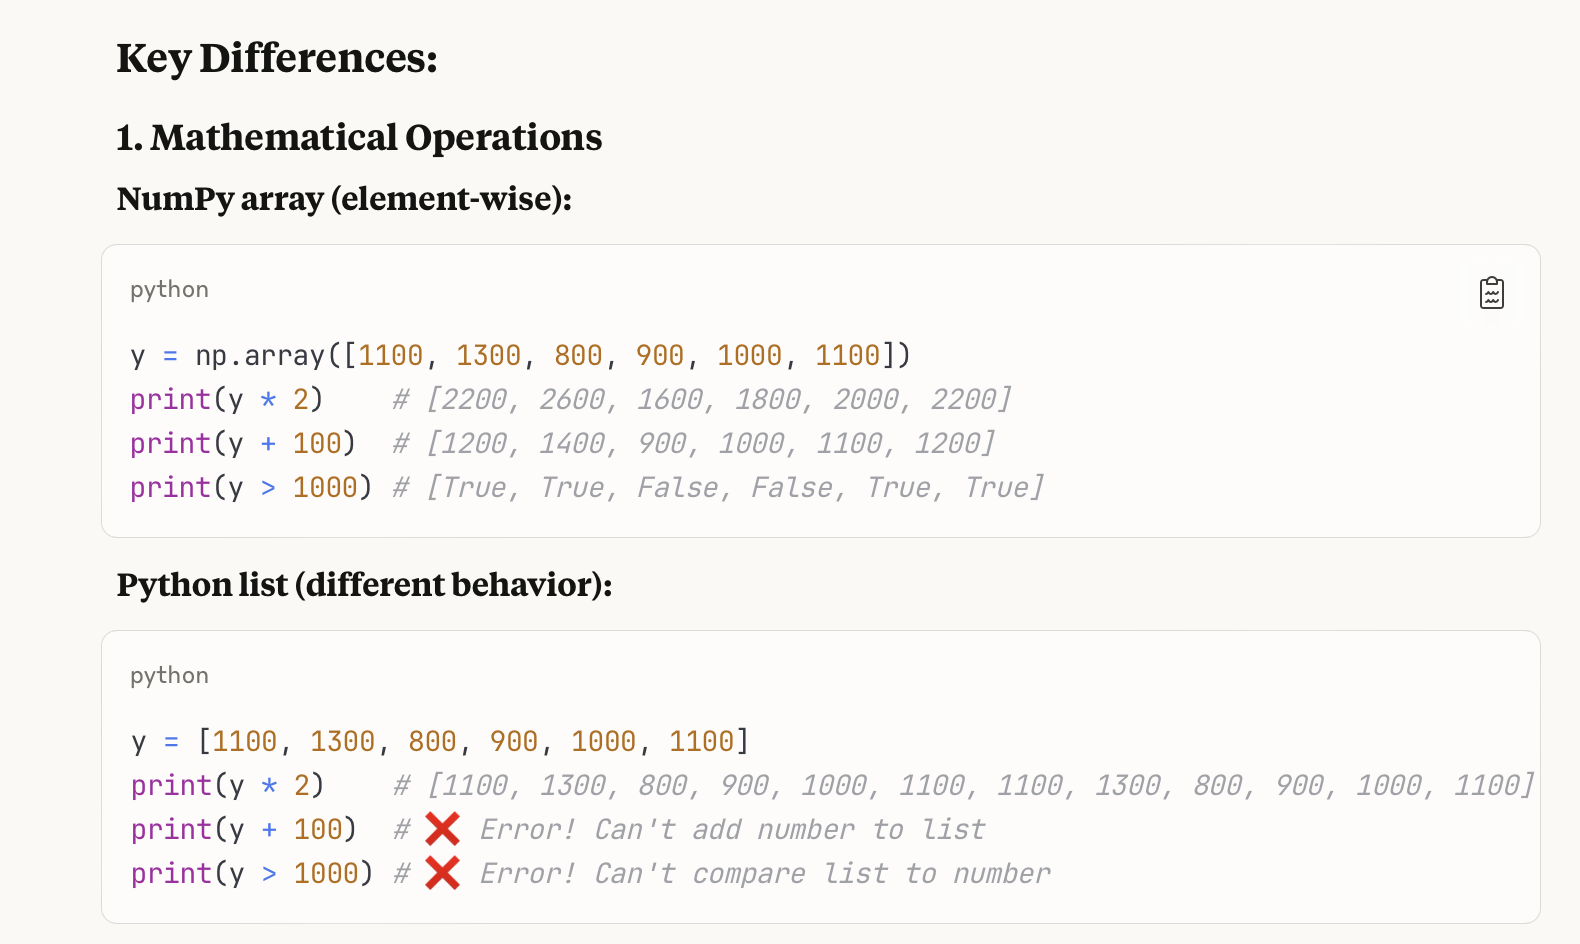
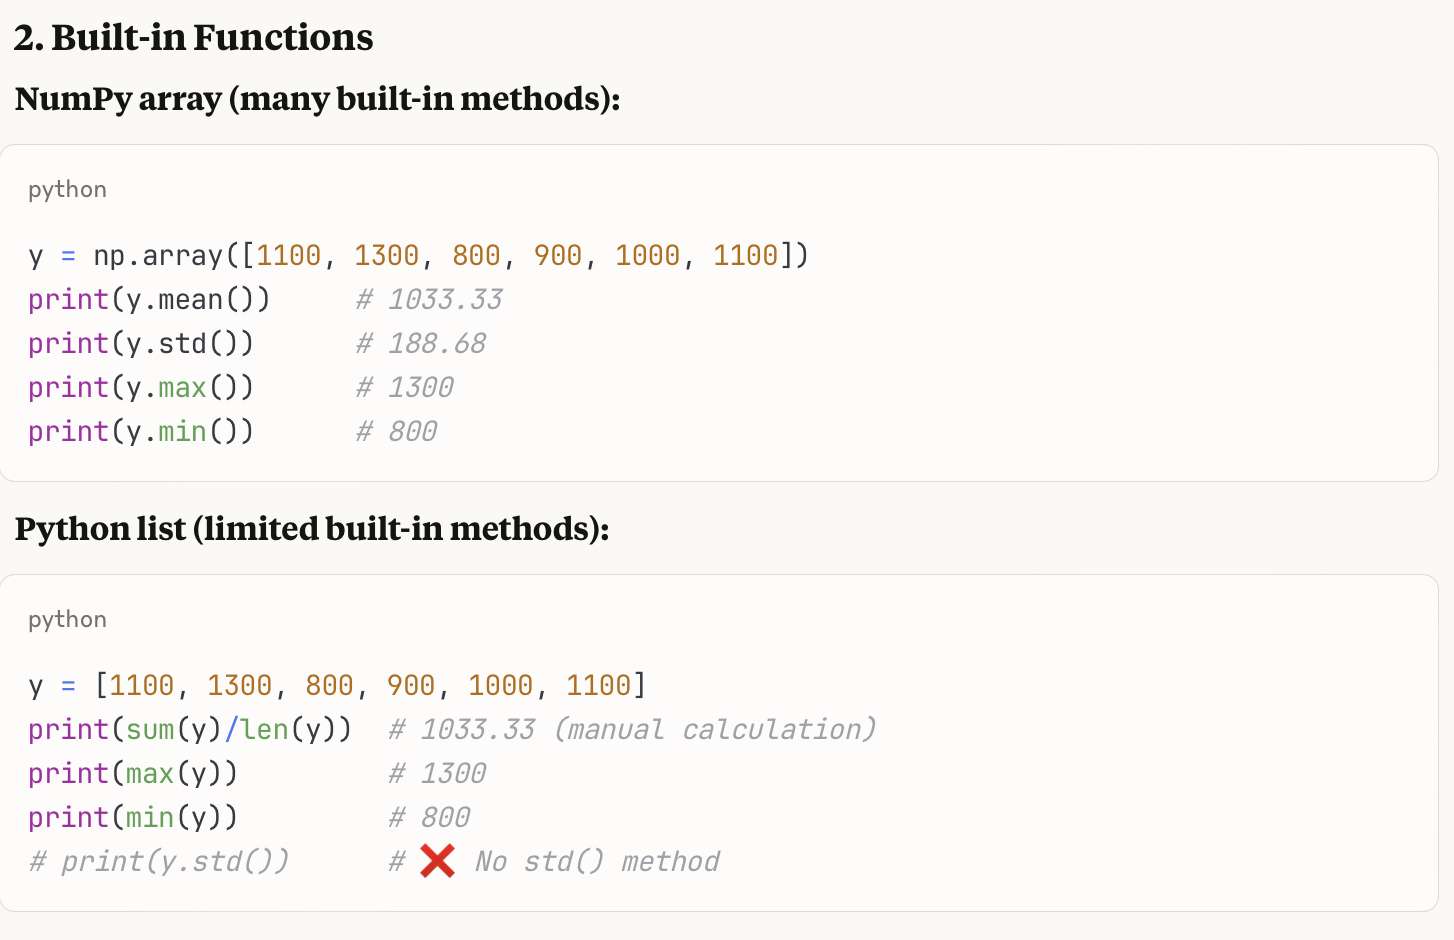
Bottom line: Use NumPy arrays for numerical computations, Python lists for general data storage!

In [136]:
w = XTX_inv.dot(X.T).dot(y)
# w = (XTX_inv @ X.T) @ y     ------- 一样的！
w

array([45.58076606,  0.42783519, 45.29127938])

In [134]:
sum(w)

np.float64(91.2998806299555)